<a href="https://colab.research.google.com/github/Abdos2004/Abdos2004/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from __future__ import division #forces floating point division
from PIL import Image #Python imaging library
import numpy as np #numirical python
import matplotlib.pyplot as plt #python plotting

In [9]:
%matplotlib inline

In [10]:
I = Image.open("140_right.jpeg")

In [11]:
I.show()

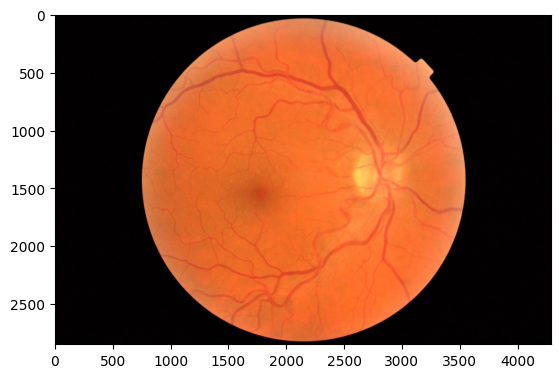

In [12]:
plt.imshow(np.asarray(I))
plt.show()

In [13]:
print(I.size, I.mode, I.format) #image information

(4288, 2848) RGB JPEG


In [14]:
I_gray = I.convert('L') #L is a grayscale mode
print(I_gray.mode)

L


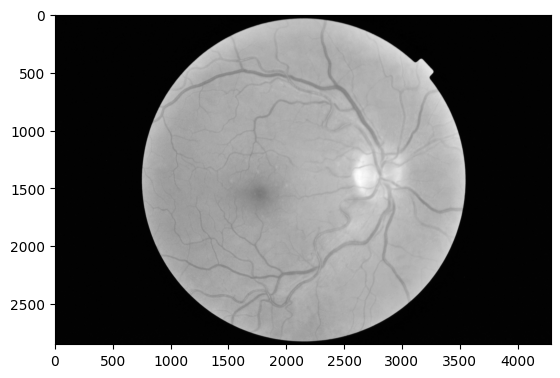

In [15]:
plt.imshow(np.asarray(I_gray), cmap='gray')
plt.show()

In [19]:
I_gray.save("140_right_gary.jpeg")

In [20]:
a = np.asarray(I_gray,dtype=np.float32) # Image class instance, I_gray, to float32 Numpy array.

In [21]:
Image.fromarray(a.astype(np.uint8)).save("I_gray_unit8.jpeg")

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Normalize the image
normalized_image = cv2.equalizeHist(I)

# Apply median filtering for noise reduction
denoised_image = cv2.medianBlur(normalized_image, 5)

# Perform vessel segmentation using thresholding
_, binary_image = cv2.threshold(denoised_image, 127, 255, cv2.THRESH_BINARY)

# Perform morphological operations to refine the segmented vessels
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Overlay the segmented vessels on the original image
vessel_overlay = cv2.bitwise_and(I, I, mask=closed_image)

# Display the enhanced image with the vessels
cv2_imshow(vessel_overlay)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: ignored